In [54]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [8]:
X = 6 * np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

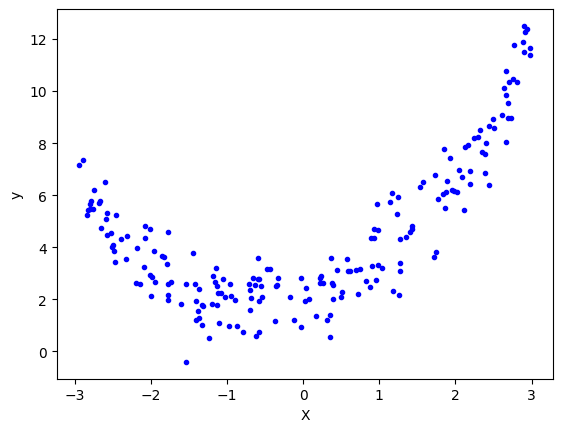

In [12]:
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [13]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
# Applying linear regression
lr = LinearRegression()

In [15]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.3964185396310832

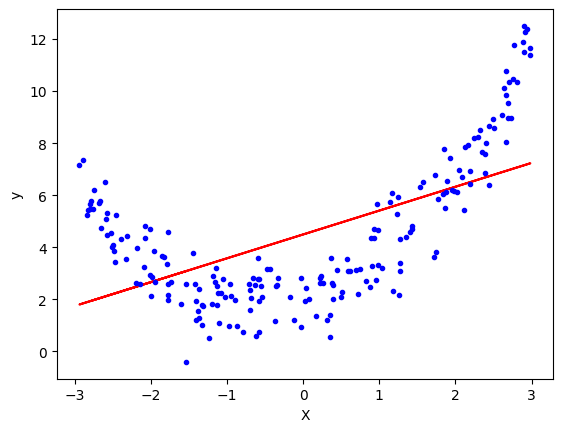

In [20]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [21]:
# Applying polynomail linear Regression
# Degree

poly = PolynomialFeatures(degree=2)
X_train_trains = poly.fit_transform(X_train)
X_test_trains = poly.transform(X_test)

In [22]:
print(X_train[0])
print(X_train_trains[0])

[-2.75946827]
[ 1.         -2.75946827  7.61466511]


In [23]:
# Include bias parameter

In [24]:
lr = LinearRegression()
lr.fit(X_train_trains,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
y_pred = lr.predict(X_test_trains)

In [32]:
y_pred

array([[ 4.82149228],
       [ 2.99642903],
       [ 2.95499655],
       [10.06548453],
       [ 2.04066902],
       [ 1.82235878],
       [ 1.90373517],
       [ 4.90760078],
       [ 3.39689954],
       [ 4.23814537],
       [ 5.27747231],
       [ 2.48532152],
       [ 8.39596683],
       [ 3.0199685 ],
       [ 2.41537293],
       [ 3.03829819],
       [ 7.12561993],
       [ 3.56199088],
       [ 2.29262035],
       [ 3.25177538],
       [ 2.84990163],
       [ 1.97797573],
       [ 9.92744854],
       [ 2.93066997],
       [ 5.61499964],
       [ 1.80540202],
       [ 2.37349607],
       [ 5.13230676],
       [ 2.31073412],
       [ 2.25728637],
       [ 3.84453923],
       [10.18335571],
       [ 3.36158785],
       [ 2.19502532],
       [ 9.84943174],
       [ 3.59906527],
       [ 4.36485311],
       [11.00877011],
       [ 2.02066409],
       [ 6.60042681]])

In [33]:
print(y_test.shape)
print(y_pred.shape)

(40, 1)
(40, 1)


In [34]:
r2_score(y_test,y_pred)

0.9049191029941752

In [35]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.8517376  0.76381812]]
[2.0279748]


In [36]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

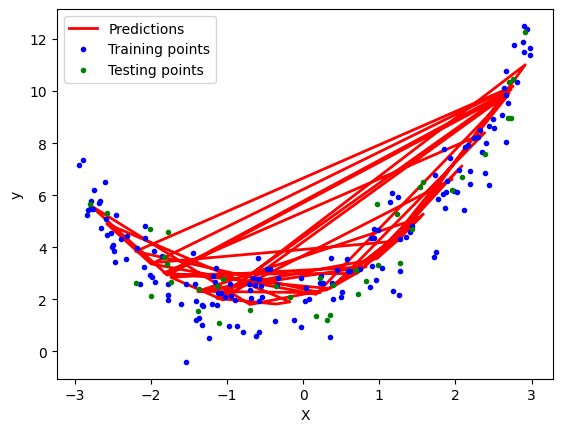

In [38]:
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.", label="Training points")
plt.plot(X_test, y_test, "g.", label="Testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

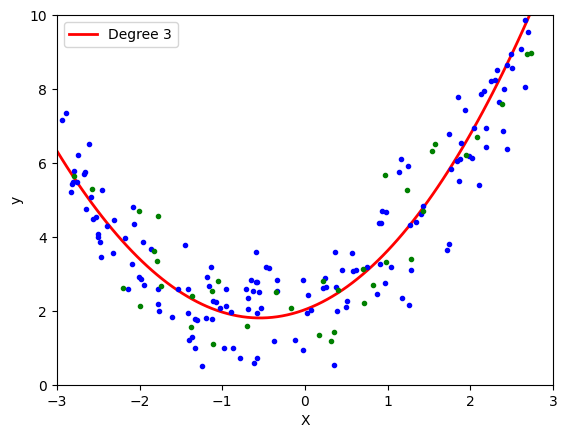

In [43]:
polynomial_regression(3)

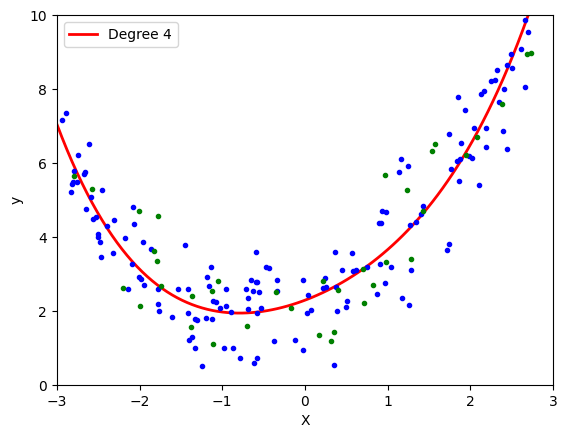

In [44]:
polynomial_regression(4)

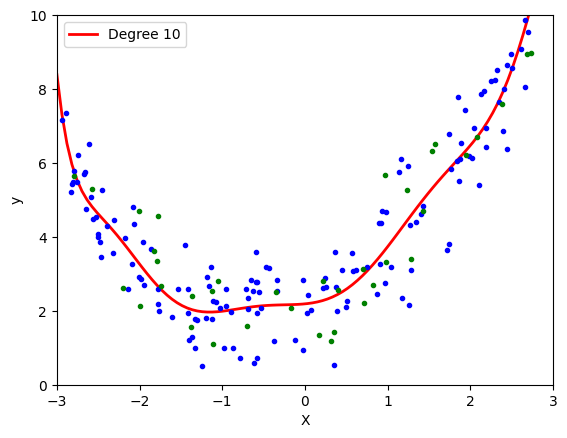

In [45]:
polynomial_regression(10)

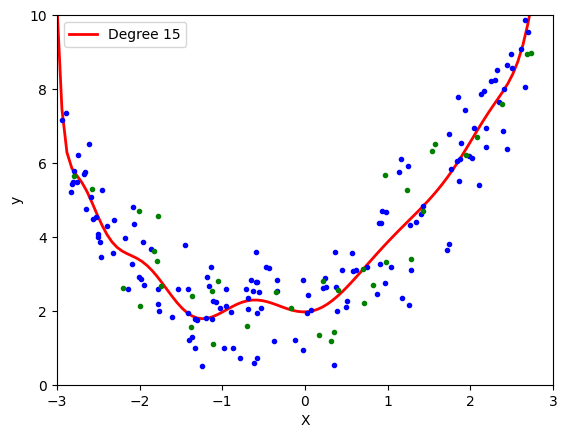

In [46]:
polynomial_regression(15)

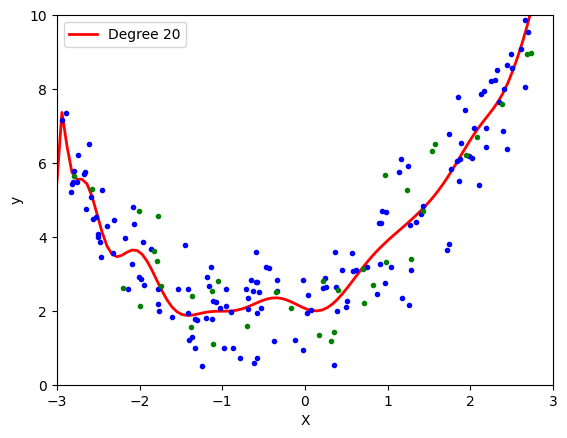

In [47]:
polynomial_regression(20)

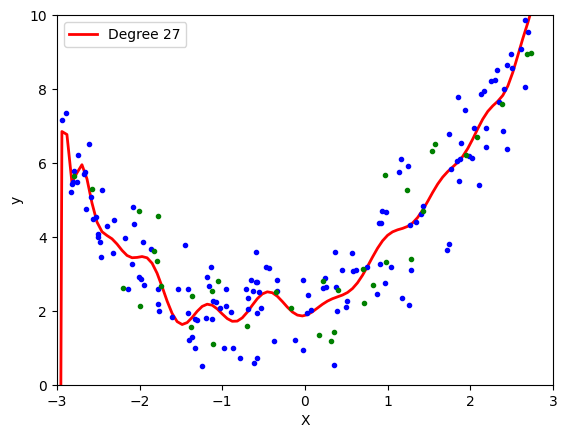

In [48]:
polynomial_regression(27)

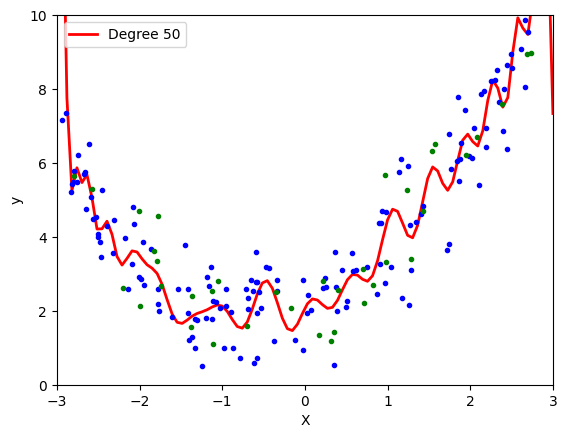

In [49]:
polynomial_regression(50)

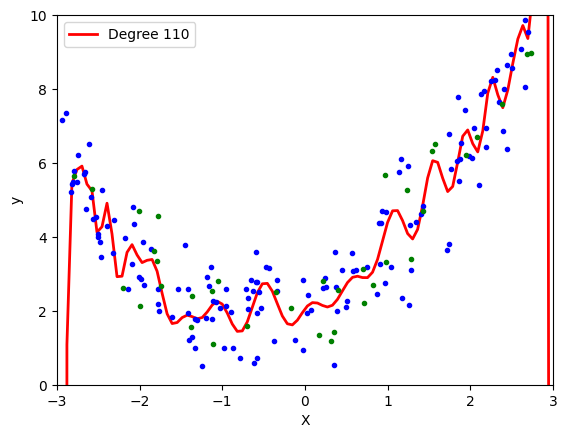

In [51]:
polynomial_regression(110)

In [52]:
poly.powers_

array([[0],
       [1],
       [2]])

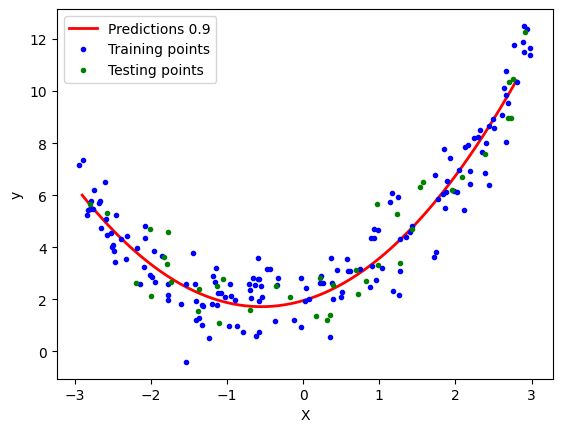

In [55]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [56]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

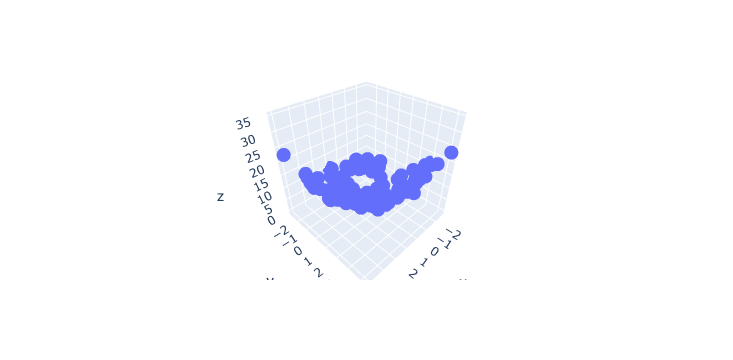

In [57]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [58]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

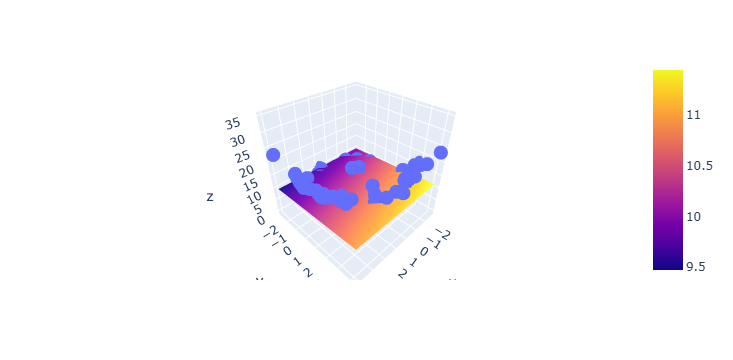

In [59]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [60]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [62]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [65]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

print("Input:", X.shape[1])
print("Output:", X_poly.shape[1])
print("Powers:\n", poly.powers_)

Input: 1
Output: 3
Powers:
 [[0]
 [1]
 [2]]
